In [69]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from collections import defaultdict

In [162]:
def test_digraph(G_func, param, start, interval, iterations=100):
    k_incr = defaultdict(list)

    for i in range(iterations):
        G = G_func(*param)
        for n in range(start+1):
            # get neighbors of in edges
            in_neighbors = [ f for f,t in G.in_edges(n) ]
            # find the current degree and how many new nodes attach to it
            old_n = [ v for v in in_neighbors if v <= start ]
            new_n = [ v for v in in_neighbors if v in range(start, start+interval)]
            k_incr[len(old_n)].append(len(new_n))
            
    return k_incr

In [163]:
def test_graph(G_func, param, start, interval, iterations=100):
    k_incr = defaultdict(list)

    for i in range(iterations):
        G = G_func(*param)
        for n in range(start+1):
            # get neighbors of in edges
            neighbors = [ f for f in G[n] ]
            # find the current degree and how many new nodes attach to it
            old_n = [ v for v in neighbors if v <= start ]
            new_n = [ v for v in neighbors if v in range(start, start+interval)]
            k_incr[len(old_n)].append(len(new_n))
            
    return k_incr

In [164]:
def model_stats(k_incr):
    k_pr = [ (k,sum(v)/len(v)) for k,v in k_incr.items() ]
    k_pr.sort()
    
    x = np.array([ k for k,v in k_pr ])
    y = [ v for k,v in k_pr ]
    
    fig, axs = plt.subplots(1,1, figsize=(5,5))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    axs.plot(x, intercept + slope*x)
    axs.scatter( x, y )
    axs.set_title('Attachment Rate vs. Degree', fontsize=20)
    axs.set_xlabel('k', fontsize=15)
    axs.set_ylabel(r'P(k $\rightarrow$ k+1)', fontsize=15)
    
    return slope, intercept, r_value, p_value, std_err

# Price Model

In [165]:
def price_model(size, C=3, alpha=1.5):
    # create DiGraph and seed network to create price model from
    G = nx.DiGraph()
    G.add_edge(1,0)
    
    # likelyhood to chose uniform random or proportional to in-degree
    weight = C/(C + alpha)
    
    # Attach nodes following price's model
    # https://en.wikipedia.org/wiki/Price%27s_model
    for i in range(len(G),size):
        r = np.random.random() 

        if r < weight:
            # select based on in-degree
            sel_edge_index = np.random.choice(len(G.edges)) 
            sel_edge = list(G.edges())[sel_edge_index]
            node_sel = sel_edge[1]
        else:
            # select based on uniform random
            node_sel = np.random.choice(G.nodes)

        G.add_edge(i, node_sel)
    
    return G

Correlation:  0.9257876977025491


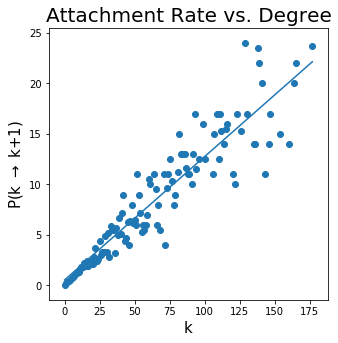

In [166]:
# Graph parameters
size = 1000
params = [size]

# Test parameters
interval = 100
start = 500
iterations = 100

k_incr = test_digraph(price_model, params, start, interval, iterations)

slope, intercept, r_value, p_value, std_err = model_stats(k_incr);
print("Correlation: ", r_value)

# Barabasi-Albert
 Networkx Built-In

Correlation:  0.8971956549742601


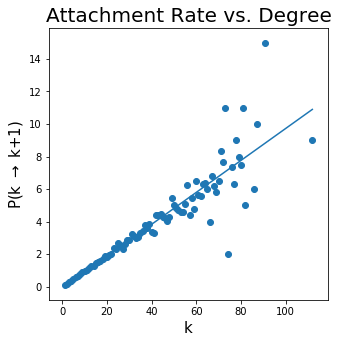

In [167]:
# Graph parameters
size = 1000
m = 1
params = [size, m]

# Test parameters
interval = 100
start = 500
iterations = 1000

k_incr = test_graph(nx.barabasi_albert_graph, params, start, interval, iterations)

slope, intercept, r_value, p_value, std_err = model_stats(k_incr);
print("Correlation: ", r_value)

Personal Implementation

In [168]:
def barabasi_albert_model(size):
    G = nx.Graph()
    G.add_edge(0,1)

    for i in range(len(G),size):
        k_sum = 2*G.number_of_edges()
        prob = [ k/k_sum for n,k in G.degree() ]  

        node_sel = np.random.choice(G.nodes(), p=prob)
        G.add_edge(i, node_sel)
        
    return G

Correlation:  0.5000406463666776


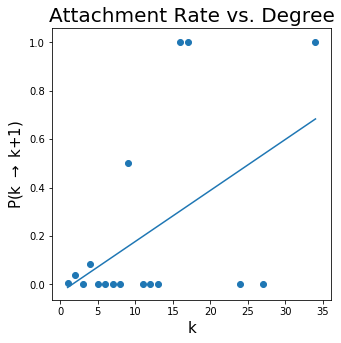

In [169]:
# Graph parameters
size = 500
params = [size]

# Test parameters
interval = 10
start = 400
iterations = 1

k_incr = test_graph(barabasi_albert_model, params, start, interval, iterations)

slope, intercept, r_value, p_value, std_err = model_stats(k_incr);
print("Correlation: ", r_value)